# Fund Clustering - Model & Labeling Workflow

## Table of contents

1. Data Handling
2. Hyperparameters
3. Log
4. Model Fit
5. Labeling


Last Date Modified: Dec 30, 2020

## Change current working directory to root of repository

In [1]:
import os

old_path = os.getcwd()

print(f"Current working directory:\n\t{old_path}")

new_path = old_path[:-len('Demo')-1]
os.chdir(new_path)

print(f"\nNew working directory:\n\n\t{new_path}")

Current working directory:
	/Users/glangetasq/Library/Mobile Documents/com~apple~CloudDocs/Columbia/Classes/Fall_20/DeepLearning/FundClusteringProject/Repo/Demo

New working directory:

	/Users/glangetasq/Library/Mobile Documents/com~apple~CloudDocs/Columbia/Classes/Fall_20/DeepLearning/FundClusteringProject/Repo


## Imports

In [17]:
import pandas as pd

In [2]:
import Config
import DataHelper
import HyperparametersHelper
import Loggers
import Models

## Model parameters

In [3]:
SOURCE_TYPE = 'csv'
MODEL_NAME = 'classic'

In [4]:
print(f"This model is trained on daily returns from {Config.TMIN} to {Config.TMAX}")

This model is trained on daily returns from 2012-01-01 to 2012-12-31


# 1. Data Handling

Limit the training data to ```n_funds``` to train faster on this exaplantory example.

In [5]:
# Limit the data to train fast on this example.
n_funds = 50

In [6]:
# Get the catcher for the model and data source
catcher = DataHelper.get_data_catcher(source=SOURCE_TYPE, model=MODEL_NAME)
# Process the data
catcher.process(n_funds=n_funds)

Loading data...


/Users/glangetasq/Library/Mobile Documents/com~apple~CloudDocs/Columbia/Classes/Fall_20/DeepLearning/FundClusteringProject/Repo/p37/lib/python3.7/site-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (47,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


... Finished loading data
Processing data...
... Finished processing data


# 2. Hyperparameters

## 2.1 Custom Hyperparameters

In [7]:
hyperparameters = HyperparametersHelper.create_prm(
    ae_weights = None,
    alpha = 1.0,
    batch_size = 64,
    cluster_init = 'hierarchical',
    dist_metric = 'eucl',
    epochs = 1000,
    eval_epochs = 20,
    gamma = 1.0,
    kernel_size = 10,
    n_clusters = None,
    n_filters = 50,
    n_units = [50, 1],
    optimizer = 'adam',
    patience = 5,
    pool_size = 12,
    pretrain_epochs = 500,
    pretrain_optimizer = 'adam',
    save_dir = 'result_secondlauer',
    save_epochs = 50,
    strides = 1,
    tol = 1e-3,
    validation = False,
    year = 2019,
)

## 2.2 Default Hyperparameters

In [8]:
hyperparameters = HyperparametersHelper.default_prm()

# 3. Log

Currently the log is far from a finished product. Its goal is to save any plots, data, statistics, or anything else during the **training** phase of the model. For now, the ```BaseLogger``` class does nothing except print what's being input in the ```dump()``` method. 

In [9]:
logger = Loggers.BaseLogger()

In [10]:
# Because it's not much use, we can take the default, None, to fit a model
logger = None

# 4. Model Fit

In [11]:
# Initialize the model
model = Models.get_model(MODEL_NAME, clustering_year=Config.CLUSTERING_YEAR)

In [12]:
# Load the data from the catcher 
model.load_raw_data(catcher=catcher)

In [13]:
# Fit the model
clustering_output = model.fit(hyperparameters=hyperparameters)

Best number of clusters for hierarchical clustering is 3
Starting searching and grouping outliers
Split finished. No more outliers could be found in the cluster according to the given criteria.
Merging finished. No more centroids could be merged cross different clusters according to the given criteria.
Start to merge outlier clusters.
There are 3 final clusters
Timesteps =  250
Pool size =  10


/Users/glangetasq/Library/Mobile Documents/com~apple~CloudDocs/Columbia/Classes/Fall_20/DeepLearning/FundClusteringProject/Repo/p37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


N clusters in DTC for 0 is 2
(None, 25, 2)
Pretraining...
Epoch 1/500
1/1 [==============================] - 8s 8s/step - loss: 1.0100
Epoch 2/500
1/1 [==============================] - 0s 48ms/step - loss: 0.9916
Epoch 3/500
1/1 [==============================] - 0s 69ms/step - loss: 0.9731
Epoch 4/500
1/1 [==============================] - 0s 71ms/step - loss: 0.9564
Epoch 5/500
1/1 [==============================] - 1s 525ms/step - loss: 0.9372
Epoch 6/500
1/1 [==============================] - 0s 105ms/step - loss: 0.9161
Epoch 7/500
1/1 [==============================] - 0s 103ms/step - loss: 0.8935
Epoch 8/500
1/1 [==============================] - 0s 98ms/step - loss: 0.8685
Epoch 9/500
1/1 [==============================] - 0s 59ms/step - loss: 0.8413
Epoch 10/500
1/1 [==============================] - 0s 150ms/step - loss: 0.8139
Epoch 11/500
1/1 [==============================] - 0s 60ms/step - loss: 0.7880
Epoch 12/500
1/1 [==============================] - 0s 113ms/step - l

1/1 [==============================] - 0s 53ms/step - loss: 0.5125
Epoch 204/500
1/1 [==============================] - 0s 45ms/step - loss: 0.5124
Epoch 205/500
1/1 [==============================] - 0s 65ms/step - loss: 0.5122
Epoch 206/500
1/1 [==============================] - 0s 52ms/step - loss: 0.5121
Epoch 207/500
1/1 [==============================] - 0s 62ms/step - loss: 0.5121
Epoch 208/500
1/1 [==============================] - 0s 49ms/step - loss: 0.5119
Epoch 209/500
1/1 [==============================] - 0s 58ms/step - loss: 0.5119
Epoch 210/500
1/1 [==============================] - 0s 50ms/step - loss: 0.5117
Epoch 211/500
1/1 [==============================] - 0s 55ms/step - loss: 0.5116
Epoch 212/500
1/1 [==============================] - 0s 55ms/step - loss: 0.5115
Epoch 213/500
1/1 [==============================] - 0s 51ms/step - loss: 0.5114
Epoch 214/500
1/1 [==============================] - 0s 59ms/step - loss: 0.5114
Epoch 215/500
1/1 [=======================

1/1 [==============================] - 0s 65ms/step - loss: 0.4797
Epoch 406/500
1/1 [==============================] - 0s 63ms/step - loss: 0.4795
Epoch 407/500
1/1 [==============================] - 0s 48ms/step - loss: 0.4794
Epoch 408/500
1/1 [==============================] - 0s 50ms/step - loss: 0.4793
Epoch 409/500
1/1 [==============================] - 0s 54ms/step - loss: 0.4791
Epoch 410/500
1/1 [==============================] - 0s 54ms/step - loss: 0.4789
Epoch 411/500
1/1 [==============================] - 0s 52ms/step - loss: 0.4787
Epoch 412/500
1/1 [==============================] - 0s 51ms/step - loss: 0.4785
Epoch 413/500
1/1 [==============================] - 0s 46ms/step - loss: 0.4783
Epoch 414/500
1/1 [==============================] - 0s 56ms/step - loss: 0.4782
Epoch 415/500
1/1 [==============================] - 0s 57ms/step - loss: 0.4780
Epoch 416/500
1/1 [==============================] - 0s 54ms/step - loss: 0.4779
Epoch 417/500
1/1 [=======================

[Train] - total loss=0.038034
Saved model to: result_secondlayer/DTC_model_0.h5
epoch 20
[Train] - total loss=0.038591
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 1/5.
epoch 40
[Train] - total loss=0.039180
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 2/5.
Saved model to: result_secondlayer/DTC_model_50.h5
epoch 60
[Train] - total loss=0.039702
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 3/5.
epoch 80
[Train] - total loss=0.040108
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 4/5.
epoch 100
[Train] - total loss=0.040423
Assignment changes 0.0 < 0.001 tolerance threshold. Patience: 5/5.
Reached max patience. Stopping training.
Saving model to: result_secondlayer/DTC_model_final.h5
Training time:  15.858828067779541
Timesteps =  250
Pool size =  10
N clusters in DTC for 1 is 7
(None, 25, 2)
Pretraining...
Epoch 1/500
1/1 [==============================] - 11s 11s/step - loss: 1.0009
Epoch 2/500
1/1 [====================

1/1 [==============================] - 0s 51ms/step - loss: 0.5158
Epoch 93/500
1/1 [==============================] - 0s 58ms/step - loss: 0.5156
Epoch 94/500
1/1 [==============================] - 0s 106ms/step - loss: 0.5155
Epoch 95/500
1/1 [==============================] - 0s 75ms/step - loss: 0.5153
Epoch 96/500
1/1 [==============================] - 0s 75ms/step - loss: 0.5152
Epoch 97/500
1/1 [==============================] - 0s 58ms/step - loss: 0.5150
Epoch 98/500
1/1 [==============================] - 0s 56ms/step - loss: 0.5149
Epoch 99/500
1/1 [==============================] - 0s 60ms/step - loss: 0.5147
Epoch 100/500
1/1 [==============================] - 0s 75ms/step - loss: 0.5146
Epoch 101/500
1/1 [==============================] - 0s 74ms/step - loss: 0.5145
Epoch 102/500
1/1 [==============================] - 0s 72ms/step - loss: 0.5143
Epoch 103/500
1/1 [==============================] - 0s 86ms/step - loss: 0.5142
Epoch 104/500
1/1 [=============================

1/1 [==============================] - 0s 72ms/step - loss: 0.5078
Epoch 194/500
1/1 [==============================] - 0s 60ms/step - loss: 0.5077
Epoch 195/500
1/1 [==============================] - 0s 50ms/step - loss: 0.5077
Epoch 196/500
1/1 [==============================] - 0s 52ms/step - loss: 0.5076
Epoch 197/500
1/1 [==============================] - 0s 59ms/step - loss: 0.5076
Epoch 198/500
1/1 [==============================] - 0s 58ms/step - loss: 0.5075
Epoch 199/500
1/1 [==============================] - 0s 62ms/step - loss: 0.5075
Epoch 200/500
1/1 [==============================] - 0s 62ms/step - loss: 0.5074
Epoch 201/500
1/1 [==============================] - 0s 60ms/step - loss: 0.5074
Epoch 202/500
1/1 [==============================] - 0s 56ms/step - loss: 0.5073
Epoch 203/500
1/1 [==============================] - 0s 58ms/step - loss: 0.5073
Epoch 204/500
1/1 [==============================] - 0s 59ms/step - loss: 0.5072
Epoch 205/500
1/1 [=======================

1/1 [==============================] - 0s 78ms/step - loss: 0.4968
Epoch 295/500
1/1 [==============================] - 0s 63ms/step - loss: 0.4965
Epoch 296/500
1/1 [==============================] - 0s 51ms/step - loss: 0.4958
Epoch 297/500
1/1 [==============================] - 0s 57ms/step - loss: 0.4954
Epoch 298/500
1/1 [==============================] - 0s 65ms/step - loss: 0.4954
Epoch 299/500
1/1 [==============================] - 0s 58ms/step - loss: 0.4952
Epoch 300/500
1/1 [==============================] - 0s 63ms/step - loss: 0.4947
Epoch 301/500
1/1 [==============================] - 0s 58ms/step - loss: 0.4941
Epoch 302/500
1/1 [==============================] - 0s 55ms/step - loss: 0.4938
Epoch 303/500
1/1 [==============================] - 0s 56ms/step - loss: 0.4936
Epoch 304/500
1/1 [==============================] - 0s 60ms/step - loss: 0.4934
Epoch 305/500
1/1 [==============================] - 0s 58ms/step - loss: 0.4930
Epoch 306/500
1/1 [=======================

Epoch 395/500
1/1 [==============================] - 0s 134ms/step - loss: 0.4800
Epoch 396/500
1/1 [==============================] - 0s 116ms/step - loss: 0.4799
Epoch 397/500
1/1 [==============================] - 0s 47ms/step - loss: 0.4799
Epoch 398/500
1/1 [==============================] - 0s 57ms/step - loss: 0.4798
Epoch 399/500
1/1 [==============================] - 0s 52ms/step - loss: 0.4797
Epoch 400/500
1/1 [==============================] - 0s 62ms/step - loss: 0.4797
Epoch 401/500
1/1 [==============================] - 0s 62ms/step - loss: 0.4796
Epoch 402/500
1/1 [==============================] - 0s 50ms/step - loss: 0.4795
Epoch 403/500
1/1 [==============================] - 0s 63ms/step - loss: 0.4794
Epoch 404/500
1/1 [==============================] - 0s 63ms/step - loss: 0.4794
Epoch 405/500
1/1 [==============================] - 0s 66ms/step - loss: 0.4793
Epoch 406/500
1/1 [==============================] - 0s 80ms/step - loss: 0.4792
Epoch 407/500
1/1 [=======

1/1 [==============================] - 0s 95ms/step - loss: 0.5033
Epoch 76/500
1/1 [==============================] - 0s 79ms/step - loss: 0.5017
Epoch 77/500
1/1 [==============================] - 0s 89ms/step - loss: 0.5003
Epoch 78/500
1/1 [==============================] - 0s 108ms/step - loss: 0.4999
Epoch 79/500
1/1 [==============================] - 0s 138ms/step - loss: 0.4979
Epoch 80/500
1/1 [==============================] - 0s 126ms/step - loss: 0.4979
Epoch 81/500
1/1 [==============================] - 0s 217ms/step - loss: 0.4962
Epoch 82/500
1/1 [==============================] - 0s 135ms/step - loss: 0.4955
Epoch 83/500
1/1 [==============================] - 0s 64ms/step - loss: 0.4946
Epoch 84/500
1/1 [==============================] - 0s 66ms/step - loss: 0.4933
Epoch 85/500
1/1 [==============================] - 0s 56ms/step - loss: 0.4930
Epoch 86/500
1/1 [==============================] - 0s 66ms/step - loss: 0.4917
Epoch 87/500
1/1 [==============================

1/1 [==============================] - 0s 83ms/step - loss: 0.4647
Epoch 177/500
1/1 [==============================] - 0s 79ms/step - loss: 0.4645
Epoch 178/500
1/1 [==============================] - 0s 121ms/step - loss: 0.4643
Epoch 179/500
1/1 [==============================] - 0s 114ms/step - loss: 0.4641
Epoch 180/500
1/1 [==============================] - 0s 51ms/step - loss: 0.4640
Epoch 181/500
1/1 [==============================] - 0s 65ms/step - loss: 0.4639
Epoch 182/500
1/1 [==============================] - 0s 59ms/step - loss: 0.4637
Epoch 183/500
1/1 [==============================] - 0s 77ms/step - loss: 0.4635
Epoch 184/500
1/1 [==============================] - 0s 80ms/step - loss: 0.4633
Epoch 185/500
1/1 [==============================] - 0s 69ms/step - loss: 0.4632
Epoch 186/500
1/1 [==============================] - 0s 75ms/step - loss: 0.4631
Epoch 187/500
1/1 [==============================] - 0s 61ms/step - loss: 0.4629
Epoch 188/500
1/1 [=====================

1/1 [==============================] - 0s 79ms/step - loss: 0.4438
Epoch 378/500
1/1 [==============================] - 0s 71ms/step - loss: 0.4437
Epoch 379/500
1/1 [==============================] - 0s 75ms/step - loss: 0.4436
Epoch 380/500
1/1 [==============================] - 0s 90ms/step - loss: 0.4435
Epoch 381/500
1/1 [==============================] - 0s 84ms/step - loss: 0.4435
Epoch 382/500
1/1 [==============================] - 0s 71ms/step - loss: 0.4434
Epoch 383/500
1/1 [==============================] - 0s 92ms/step - loss: 0.4433
Epoch 384/500
1/1 [==============================] - 0s 71ms/step - loss: 0.4433
Epoch 385/500
1/1 [==============================] - 0s 83ms/step - loss: 0.4432
Epoch 386/500
1/1 [==============================] - 0s 65ms/step - loss: 0.4431
Epoch 387/500
1/1 [==============================] - 0s 74ms/step - loss: 0.4431
Epoch 388/500
1/1 [==============================] - 0s 145ms/step - loss: 0.4430
Epoch 389/500
1/1 [======================

Epoch 478/500
1/1 [==============================] - 0s 70ms/step - loss: 0.4382
Epoch 479/500
1/1 [==============================] - 0s 65ms/step - loss: 0.4382
Epoch 480/500
1/1 [==============================] - 0s 74ms/step - loss: 0.4382
Epoch 481/500
1/1 [==============================] - 0s 73ms/step - loss: 0.4384
Epoch 482/500
1/1 [==============================] - 0s 74ms/step - loss: 0.4385
Epoch 483/500
1/1 [==============================] - 0s 65ms/step - loss: 0.4389
Epoch 484/500
1/1 [==============================] - 0s 77ms/step - loss: 0.4391
Epoch 485/500
1/1 [==============================] - 0s 74ms/step - loss: 0.4395
Epoch 486/500
1/1 [==============================] - 0s 77ms/step - loss: 0.4394
Epoch 487/500
1/1 [==============================] - 0s 73ms/step - loss: 0.4390
Epoch 488/500
1/1 [==============================] - 0s 71ms/step - loss: 0.4381
Epoch 489/500
1/1 [==============================] - 0s 70ms/step - loss: 0.4377
Epoch 490/500
1/1 [=========

In [24]:
result = pd.DataFrame.from_dict(clustering_output, orient='index')
result.columns = ['main_cluster', 'sub_cluster']
result.head(10)

,main_cluster,sub_cluster
2704,0,0
2736,0,1
2738,0,0
2741,0,0
45875,1,6
45876,1,1
45877,1,1
45878,1,1
45879,1,0
45880,1,0


# 5. Labeling

## 5.1 First Layer Labeling

In [1]:
from Labeling.FirstLayerLabeling import FirstLayerLabeling

first_layer_label = FirstLayerLabeling('HoldingDataMainClustering')

clustering_year = 2018

# need to first set up
# read clustering results from either csv or sql file
''' If source type is csv, please modify data reading path in Config.paths '''

first_layer_label.set_up(clustering_year, source_type='csv', model_name='classic', file='cluster_result_2018.csv')


Loading data...
... Finished loading data
Processing data...
... Finished processing data
Set up done for result visualization


In [2]:
# generate label info for each fund
first_layer_label.get_fund_label()

Sucessfully saved the clustering output!


,Fund.No,Ticker,Cluster,cash,equity,bond,security,Mstar Category,Cluster Category,sharpe_ratio,absolute_return,absolute_return_val
0,105,APITX,19,0.53,99.47,0.00,0.00,Global Small-/Mid-Cap Funds,equity driven group,low: -2.2956--1.2715,high,-0.1446
1,2704,GFIZX,10,-27.46,24.75,52.82,49.90,Mixed-Asset Target Alloc Consv Funds,bond security mixed group,high: -1.9217--0.4695,high,-0.0213
2,2706,GGIZX,24,-14.33,43.80,41.53,28.97,Mixed-Asset Target Alloc Moderate Funds,Deversified group,high: -1.4356--0.8731,low,-0.0489
3,2708,GCOZX,12,-9.03,69.99,21.75,17.26,Mixed-Asset Target Alloc Growth Funds,Deversified group,high: -1.0797--0.6207,low,-0.0750
4,2724,GGBZX,19,-4.77,93.16,4.67,6.93,Mixed-Asset Target Alloc Agg Gro Funds,equity driven group,medium: -1.2715--0.5888,low,-0.1015
...,...,...,...,...,...,...,...,...,...,...,...,...
11268,91559,TALFX,18,1.75,89.50,7.57,1.21,Mixed-Asset Target Alloc Agg Gro Funds,equity driven group,medium: -1.1601--0.8877,low,-0.0923
11269,93598,LSIOX,20,2.87,1.36,90.79,4.98,High Yield Funds,bond driven group,medium: -3.116--2.2981,low,-0.0205
11270,93941,SVDHX,20,14.51,0.00,87.95,-2.45,Absolute Return Funds,bond driven group,high: -2.2981--1.0712,low,-0.1127
11271,94443,BIDAX,20,-0.04,0.00,99.42,0.63,General & Insured Municipal Debt Funds,bond driven group,medium: -3.116--2.2981,high,0.0117


In [3]:
# get funds based on cluster number/name provided
first_layer_label.get_fund_list(20)

,Fund.No,Ticker,Cluster,cash,equity,bond,security,Mstar Category,Cluster Category,sharpe_ratio,absolute_return,absolute_return_val
33,2966,AITFX,20,1.68,0.00,98.37,-0.06,Short-Intmdt Municipal Debt Funds,bond driven group,low: -4.3428--3.116,high,0.0093
34,2970,ATFAX,20,1.68,0.00,98.37,-0.06,Short-Intmdt Municipal Debt Funds,bond driven group,low: -4.3428--3.116,high,0.0070
35,2972,ATFIX,20,1.68,0.00,98.37,-0.06,Short-Intmdt Municipal Debt Funds,bond driven group,low: -4.3428--3.116,high,0.0093
105,3159,ALMIX,20,0.10,0.00,99.90,0.00,Inflation Protected Bond Funds,bond driven group,low: -4.3428--3.116,low,-0.0261
106,3160,SHTIX,20,0.10,0.00,99.90,0.00,Inflation Protected Bond Funds,bond driven group,low: -4.3428--3.116,low,-0.0261
...,...,...,...,...,...,...,...,...,...,...,...,...
11259,63401,FCSPX,20,0.44,0.00,97.84,1.72,General Bond Funds,bond driven group,high: -2.2981--1.0712,low,-0.0318
11269,93598,LSIOX,20,2.87,1.36,90.79,4.98,High Yield Funds,bond driven group,medium: -3.116--2.2981,low,-0.0205
11270,93941,SVDHX,20,14.51,0.00,87.95,-2.45,Absolute Return Funds,bond driven group,high: -2.2981--1.0712,low,-0.1127
11271,94443,BIDAX,20,-0.04,0.00,99.42,0.63,General & Insured Municipal Debt Funds,bond driven group,medium: -3.116--2.2981,high,0.0117


In [4]:
# generate the label info for each cluster
first_layer_label.generate_cluster_label()

,Common Stock,Preferred Stock,Convertible Bonds,Corporate Bonds,Muni Bonds,Gov Bonds,Other Securities,Cash,ABS,MBS,Other Equity,Other FI,No. of funds,Cluster Description,Single Asset Focus,Multi Asset Focus,Shorted Asset
Cluster,,,,,,,,,,,,,,,,,
0,92.960,1.16,0.00,1.73,0.01,2.090,-100.51,100.95,0.00,0.000,1.59,0.020,2,"80%> investment in Cash and Common Stock, shor...",,"Cash, Common Stock",Other Securities
1,0.000,0.00,0.00,0.00,0.00,0.000,0.00,97.31,0.00,0.000,0.00,0.000,15,Heavily invested (75%>) in Cash,Cash,,
2,31.300,0.21,0.00,20.56,0.98,24.790,-30.38,44.59,3.26,2.720,1.26,0.720,11,"Evenly diversified multi-asset: Cash, Common S...",,"Cash, Common Stock, Gov Bonds",Other Securities
3,0.000,0.00,0.00,1.80,0.14,61.880,136.94,-104.74,0.00,0.000,0.00,0.090,20,80%> investment in Other Securities and Gov Bo...,,"Other Securities, Gov Bonds",Cash
4,57.210,0.34,0.00,4.58,0.06,15.860,-53.92,72.14,0.00,0.000,1.97,0.140,17,"Uneven multi-asset: Cash, shorted Other Securi...",,Cash,Other Securities
5,0.000,0.00,0.00,0.07,0.00,1.620,0.00,-65.12,31.40,100.900,0.00,1.710,11,"Uneven multi-asset: MBS, ABS, Other FI, Gov Bo...",,"MBS, ABS, Other FI, Gov Bonds, Corporate Bonds...",Cash
6,32.860,0.00,0.00,0.00,0.00,0.000,0.00,70.18,0.00,0.000,0.13,0.000,15,80%> investment in Cash and Common Stock,,"Cash, Common Stock",
7,0.000,0.00,0.00,15.58,0.17,51.175,61.11,-60.25,7.23,12.160,0.00,0.245,28,"Uneven multi-asset: Other Securities, Gov Bond...",,"Other Securities, Gov Bonds, Corporate Bonds",Cash
8,12.210,0.81,7.30,15.78,0.13,26.900,-40.42,68.11,3.62,0.480,1.20,3.890,3,"Uneven multi-asset: Cash, Gov Bonds, Corporate...",,"Cash, Gov Bonds, Corporate Bonds",Other Securities


In [5]:
# Set-up function for generating cluster characteristics 
    # must be implemented before get_cluster_characteristics()
first_layer_label.generate_cluster_characteristics()

Successfully generated cluster characteristics!


<<Median holding asset percentages>>
Common Stock         0.926707
Cash                 0.032097
Gov Bonds            0.028197
Other Securities     0.011399
Other FI             0.001200
Corporate Bonds      0.000400
Other Equity         0.000000
MBS                  0.000000
ABS                  0.000000
Muni Bonds           0.000000
Convertible Bonds    0.000000
Preferred Stock      0.000000
Name: 50%, dtype: float64


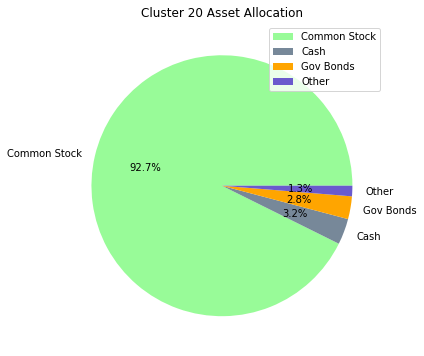

,Cluster Description,Single Asset Focus,Multi Asset Focus,Shorted Asset,volatility,annual_return,max_dd,vol_median,return_median,max_dd_median,...,Convertible Bonds,Corporate Bonds,Muni Bonds,Gov Bonds,Other Securities,Cash,ABS,MBS,Other Equity,Other FI
Cluster,,,,,,,,,,,,,,,,,,,,,
20,Heavily invested (75%>) in Muni Bonds,Muni Bonds,,,Low,High,Low,0.001,0.002,0.02,...,0.0,0.0,97.59,0.0,0.0,0.78,0.0,0.0,0.0,0.36


In [6]:
# Get funds characterisitics based on cluster name provide
first_layer_label.get_cluster_characteristics(20, pieplot=True)

In [7]:
# Based on fund ranking provided in database, provide the top fund in the cluster, 
    # this need connection to alternative data project, could just return list of fund for now
first_layer_label.get_top_funds_in_cluster(20)

,Fund.No,Ticker,Cluster,cash,equity,bond,security,Mstar Category,Cluster Category,sharpe_ratio,absolute_return,absolute_return_val
33,2966.0,AITFX,20,1.68,0.00,98.37,-0.06,Short-Intmdt Municipal Debt Funds,bond driven group,low: -4.3428--3.116,high,0.0093
34,2970.0,ATFAX,20,1.68,0.00,98.37,-0.06,Short-Intmdt Municipal Debt Funds,bond driven group,low: -4.3428--3.116,high,0.0070
35,2972.0,ATFIX,20,1.68,0.00,98.37,-0.06,Short-Intmdt Municipal Debt Funds,bond driven group,low: -4.3428--3.116,high,0.0093
105,3159.0,ALMIX,20,0.10,0.00,99.90,0.00,Inflation Protected Bond Funds,bond driven group,low: -4.3428--3.116,low,-0.0261
106,3160.0,SHTIX,20,0.10,0.00,99.90,0.00,Inflation Protected Bond Funds,bond driven group,low: -4.3428--3.116,low,-0.0261
...,...,...,...,...,...,...,...,...,...,...,...,...
11259,63401.0,FCSPX,20,0.44,0.00,97.84,1.72,General Bond Funds,bond driven group,high: -2.2981--1.0712,low,-0.0318
11269,93598.0,LSIOX,20,2.87,1.36,90.79,4.98,High Yield Funds,bond driven group,medium: -3.116--2.2981,low,-0.0205
11270,93941.0,SVDHX,20,14.51,0.00,87.95,-2.45,Absolute Return Funds,bond driven group,high: -2.2981--1.0712,low,-0.1127
11271,94443.0,BIDAX,20,-0.04,0.00,99.42,0.63,General & Insured Municipal Debt Funds,bond driven group,medium: -3.116--2.2981,high,0.0117


## 5.2 Second Layer Labeling

In [1]:
from Labeling.SubclusterLabeling import SubclusterLabeling

subcluster_label = SubclusterLabeling('DailyReturnSubClustering')

clustering_year = 2018

# need to first set up
# read clustering results from either csv or sql file
subcluster_label.set_up(clustering_year, source_type='csv', model_name='classic', file='final_output/cluster_result_withsub_2018.csv') 


Loading data...
... Finished loading data
Processing data...
... Finished processing data
Set up done for result visualization


In [2]:
# generate label info for each fund
subcluster_label.get_fund_label(save_results=False)

,Fund.No,Ticker,Cluster,Subcluster,Cash,Equity,Bond,Security,Mstar Category,Cluster Category,sharpe_ratio,absolute_return,absolute_return_val
0,105,APITX,25,2,0.53,99.47,0.00,0.00,Global Small-/Mid-Cap Funds,equity driven group,low: -2.2956--1.2715,high,-0.1446
1,2704,GFIZX,15,0,-27.46,24.75,52.82,49.90,Mixed-Asset Target Alloc Consv Funds,bond security mixed group,high: -2.0773--0.4711,low,-0.0213
2,2706,GGIZX,23,10,-14.33,43.80,41.53,28.97,Mixed-Asset Target Alloc Moderate Funds,Deversified group,high: -1.422--0.8415,low,-0.0489
3,2708,GCOZX,17,6,-9.03,69.99,21.75,17.26,Mixed-Asset Target Alloc Growth Funds,Deversified group,medium: -1.3672--1.0313,low,-0.0750
4,2724,GGBZX,25,2,-4.77,93.16,4.67,6.93,Mixed-Asset Target Alloc Agg Gro Funds,equity driven group,medium: -1.2715--0.5888,low,-0.1015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11268,91559,TALFX,26,1,1.75,89.50,7.57,1.21,Mixed-Asset Target Alloc Agg Gro Funds,equity driven group,medium: -1.1658--0.8871,low,-0.0923
11269,93598,LSIOX,27,10,2.87,1.36,90.79,4.98,High Yield Funds,bond driven group,medium: -3.1073--2.2874,low,-0.0205
11270,93941,SVDHX,27,3,14.51,0.00,87.95,-2.45,Absolute Return Funds,bond driven group,high: -2.2874--1.0575,low,-0.1127
11271,94443,BIDAX,27,2,-0.04,0.00,99.42,0.63,General & Insured Municipal Debt Funds,bond driven group,medium: -3.1073--2.2874,high,0.0117


In [3]:
# get funds based on cluster name and subcluster provided
subcluster_label.get_fund_list(20,3)

index  Fund.No Ticker  Cash  Equity   Bond  Security  \
Cluster Subcluster                                                         
20      3             293     4100  ABQIX -0.73    0.19  55.43     45.12   
        3             294     4101  ABQKX -0.73    0.19  55.43     45.12   
        3             295     4104  ABQRX -0.73    0.19  55.43     45.12   
        3             296     4107  ABQCX -0.73    0.19  55.43     45.12   
        3             297     4109  ABQUX -0.73    0.19  55.43     45.12   
...                   ...      ...    ...   ...     ...    ...       ...   
        3           11042    48253  JDFRX  1.02    0.00  56.18     42.79   
        3           11043    48254  JADFX  1.02    0.00  56.18     42.79   
        3           11201    58327  MXFDX  1.07    0.00  57.63     41.29   
        3           11242    59259  FXICX -6.65    0.00  63.14     43.52   
        3           11262    87775  UTBPX  1.29    0.26  47.40     51.06   

                               Mstar Category           Cluster Category  \
Cluster Subcluster                                                         
20      3                     Core Bond Funds  bond security mixed group   
        3                     Core Bond Funds  bond security mixed group   
        3                     Core Bond Funds  bond security mixed group   
        3                     Core Bond Funds  bond security mixed group   
        3                     Core Bond Funds  bond security mixed group   
...                                       ...                        ...   
        3                Core Plus Bond Funds  bond security mixed group   
        3                Core Plus Bond Funds  bond security mixed group   
        3                     Core Bond Funds  bond security mixed group   
        3           Multi-Sector Income Funds  bond security mixed group   
        3                Core Plus Bond Funds  bond security mixed group   

                               sharpe_ratio absolute_return  \
Cluster Subcluster                                            
20      3           medium: -3.1472--2.1678            high   
        3           medium: -3.1472--2.1678            high   
        3           medium: -3.1472--2.1678            high   
        3           medium: -3.1472--2.1678            high   
        3           medium: -3.1472--2.1678            high   
...                                     ...             ...   
        3           medium: -3.1472--2.1678             low   
        3           medium: -3.1472--2.1678             low   
        3           medium: -3.1472--2.1678            high   
        3           medium: -3.1472--2.1678            high   
        3           medium: -3.1472--2.1678             low   

                    absolute_return_val  
Cluster Subcluster                       
20      3                       -0.0051  
        3                       -0.0075  
        3                       -0.0097  
        3                       -0.0142  
        3                       -0.0074  
...                                 ...  
        3                       -0.0179  
        3                       -0.0156  
        3                       -0.0121  
        3                       -0.0009  
        3                       -0.0235  

[178 rows x 12 columns]

In [4]:
# generate the label info for each cluster and subcluster
subcluster_label.generate_cluster_label()

Common Stock  Preferred Stock  Convertible Bonds  \
Cluster Subcluster                                                     
0       0                  92.96             1.16                0.0   
1       0                   0.00             0.00                0.0   
        1                   0.64             0.00                0.0   
        2                   0.00             0.00                0.0   
        3                   0.00             0.00                0.0   
...                          ...              ...                ...   
27      6                   0.00             0.00                0.0   
        7                   0.00             0.00                0.0   
        8                   0.00             0.00                0.0   
        9                   0.00             0.00                0.0   
        10                  0.00             0.00                0.0   

                    Corporate Bonds  Muni Bonds  Gov Bonds  Other Securities  \
Cluster Subcluster                                                             
0       0                      1.73       0.010       2.09           -100.51   
1       0                      0.00       0.000       0.00              0.00   
        1                      6.64       0.050       0.54              0.08   
        2                      0.00       0.000       0.00              0.00   
        3                      0.00       0.000       0.00             11.65   
...                             ...         ...        ...               ...   
27      6                     25.62       0.405      71.97              0.00   
        7                     70.13       2.840      22.86              0.00   
        8                     29.90       0.710      65.76              0.00   
        9                      2.54       0.000      96.86              0.04   
        10                     0.00      97.545       0.00              0.00   

                       Cash   ABS   MBS  Other Equity  Other FI  No. of funds  \
Cluster Subcluster                                                              
0       0           100.950  0.00  0.00          1.59      0.02             2   
1       0           100.000  0.00  0.00          0.00      0.00             2   
        1            91.590  0.00  0.00          0.00      0.45             4   
        2           100.000  0.00  0.00          0.00      0.00             2   
        3            88.350  0.00  0.00          0.00      0.00             2   
...                     ...   ...   ...           ...       ...           ...   
27      6             0.145  0.02  0.00          0.00      0.32            36   
        7             0.340  0.47  1.11          0.00      0.00            15   
        8             1.180  0.00  0.00          0.00      0.65            47   
        9             0.270  0.10  0.00          0.00      0.00            49   
        10            0.375  0.00  0.00          0.00      0.45           222   

                                                  Cluster Description  \
Cluster Subcluster                                                      
0       0           80%> investment in Cash and Common Stock, shor...   
1       0                             Heavily invested (75%>) in Cash   
        1                             Heavily invested (75%>) in Cash   
        2                             Heavily invested (75%>) in Cash   
        3                             Heavily invested (75%>) in Cash   
...                                                               ...   
27      6            80%> investment in Gov Bonds and Corporate Bonds   
        7            80%> investment in Corporate Bonds and Gov Bonds   
        8            80%> investment in Gov Bonds and Corporate Bonds   
        9                        Heavily invested (75%>) in Gov Bonds   
        10                      Heavily invested (75%>) in Muni Bonds   

                   Single Asset Focus 

In [5]:
# Set-up function for generating cluster characteristics 
    # must be implemented before get_cluster_characteristics()
subcluster_label.generate_cluster_characteristics()

Successfully generated cluster characteristics!


<<Median holding asset percentages>>
Corporate Bonds      0.351215
MBS                  0.267218
Gov Bonds            0.193708
ABS                  0.169104
Other FI             0.010588
Muni Bonds           0.004033
Other Securities     0.003328
Cash                 0.000807
Other Equity         0.000000
Convertible Bonds    0.000000
Preferred Stock      0.000000
Common Stock         0.000000
Name: 50%, dtype: float64


Cluster Description         Evenly diversified multi-asset: Corporate Bond...
Single Asset Focus                                                           
Multi Asset Focus                                        Corporate Bonds, MBS
Shorted Asset                                                                
volatility                                                                Low
annual_return                                                             Mid
max_dd                                                                    Low
vol_median                                                              0.002
return_median                                                          -0.013
max_dd_median                                                           0.031
Top Morningstar Category                                      Core Bond Funds
Top Cluster Category                                bond security mixed group
allocation_chg_std                                              

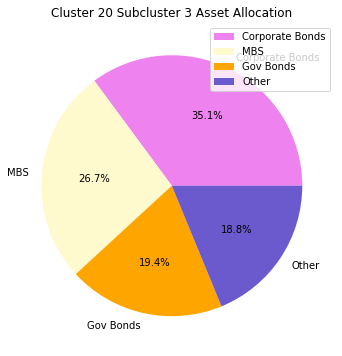

In [6]:
# Get funds characterisitics based on cluster name provide
subcluster_label.get_cluster_characteristics(cluster_name=20, subcluster_name=3, pieplot=True)

In [7]:
# Based on fund ranking provided in database, provide the top fund in the cluster, 
    # this need connection to alternative data project, could just return list of fund for now
subcluster_label.get_top_funds_in_cluster(cluster_name=20, subcluster_name=0)

level_0  index  Fund.No Ticker  Cash  Equity   Bond  \
Cluster Subcluster                                                        
20      0              6415   6415    24431  PXTAX  0.61     0.0  60.78   
        0              6416   6416    24433  PXTIX  0.61     0.0  60.78   
        0              6417   6417    24435  PIXCX  0.61     0.0  60.78   
        0              6418   6418    24436  PIXAX  0.61     0.0  60.78   
        0              9445   9445    37792  PIXPX  0.61     0.0  60.78   

                    Security         Mstar Category  \
Cluster Subcluster                                    
20      0              38.59  Large-Cap Value Funds   
        0              38.59  Large-Cap Value Funds   
        0              38.59  Large-Cap Value Funds   
        0              38.59  Large-Cap Value Funds   
        0              38.59  Large-Cap Value Funds   

                             Cluster Category           sharpe_ratio  \
Cluster Subcluster                                                     
20      0           bond security mixed group  high: -2.1678--0.6987   
        0           bond security mixed group  high: -2.1678--0.6987   
        0           bond security mixed group  high: -2.1678--0.6987   
        0           bond security mixed group  high: -2.1678--0.6987   
        0           bond security mixed group  high: -2.1678--0.6987   

                   absolute_return  absolute_return_val  
Cluster Subcluster                                       
20      0                      low              -0.0834  
        0                      low              -0.0810  
        0                      low              -0.0913  
        0                      low              -0.0840  
        0                      low              -0.0822